In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import functions as fnc

### Hyperparameters

In [22]:
nbin = 250 #number of bins for the histogram
Nsamples=1000

# CV interval, mind the CV range!
min_CV=0.35
max_CV=0.5
cv_col=1 #CV column in the COLVAR file, please check!

# data range to be used
time_0=0
time_max=25000

#Other parameters
min_id=0  #run index
max_id=5
natoms=328
lines_per_split=natoms+2 #fixed

In [23]:
type_of_sim="bias_140_pace_250/"
main_path="/work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica"+"/"+type_of_sim
out_path=main_path #where to save the output files

if (out_path!=main_path):
    os.system("mkdir -p "+out_path)

### Substitute parameters in header template for scf calculation

In [24]:
fnc.subs_head(natoms)

### Run with CV interval, regardless of models deviations

/tmp/ipykernel_1559611/2036070554.py:8: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=25000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  cv= np.loadtxt(COLVAR_file,usecols=(cv_col,),unpack=True,skiprows=skip,max_rows=time_max-time_0)


Number of DATA points 25000
Reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_0/dump.xyz
End reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_0/dump.xyz
Configurations in the CV interval: [0.35,0.5]: 2984;0.11936
Writing  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_0//geom_sel_transition.xyz


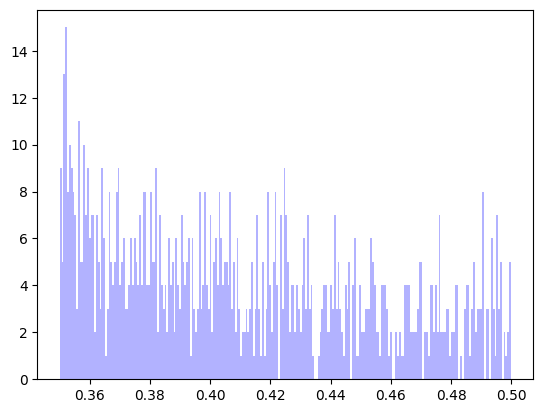

Number of DATA points 25000
Reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_1/dump.xyz
End reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_1/dump.xyz
Configurations in the CV interval: [0.35,0.5]: 2460;0.0984
Writing  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_1//geom_sel_transition.xyz


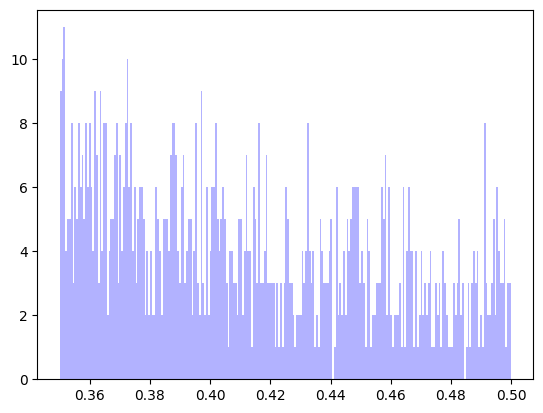

Number of DATA points 22523
Reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_2/dump.xyz
End reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_2/dump.xyz
Configurations in the CV interval: [0.35,0.5]: 2649;0.11761310660214004
Writing  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_2//geom_sel_transition.xyz


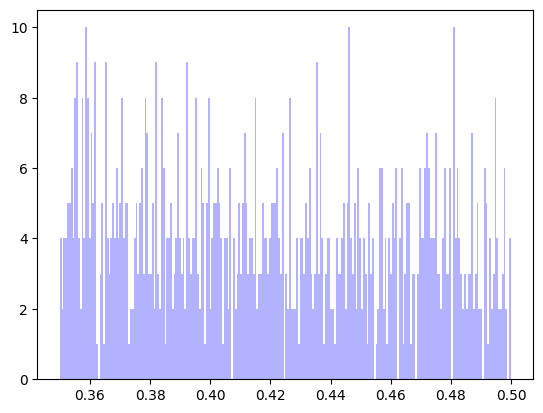

Number of DATA points 25000
Reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_3/dump.xyz
End reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_3/dump.xyz
Configurations in the CV interval: [0.35,0.5]: 2555;0.1022
Writing  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_3//geom_sel_transition.xyz


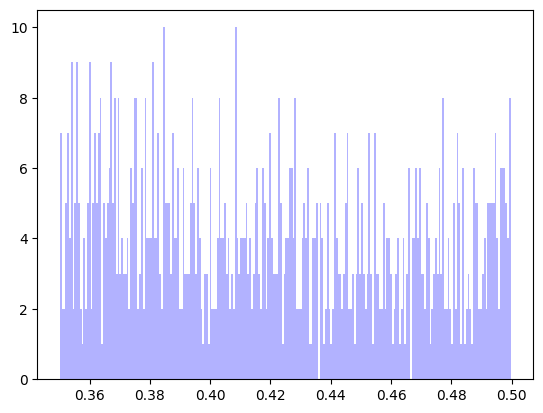

Number of DATA points 25000
Reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_4/dump.xyz
End reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_4/dump.xyz
Configurations in the CV interval: [0.35,0.5]: 2147;0.08588
Writing  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_4//geom_sel_transition.xyz


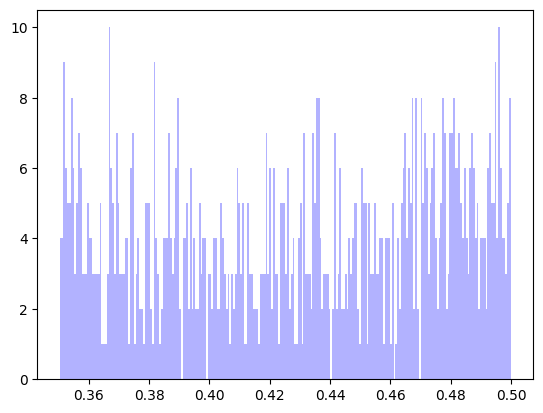

Number of DATA points 22038
Reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_5/dump.xyz
End reading  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_5/dump.xyz
Configurations in the CV interval: [0.35,0.5]: 2701;0.12256103094654687
Writing  /work/fmambretti/uzbeko/round11/NN_form/coord_NH-NH_all/replica/bias_140_pace_250//run_5//geom_sel_transition.xyz


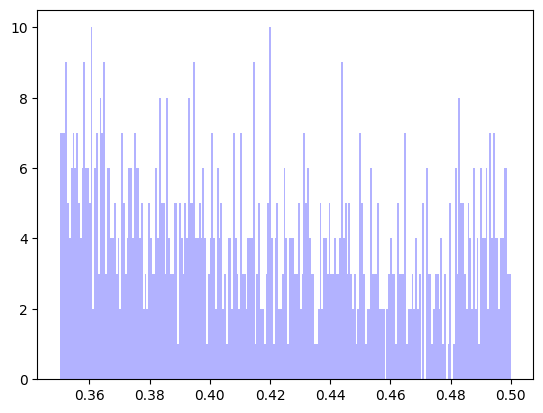

In [25]:
for t in range(min_id,max_id+1):
    path = main_path+"/run_{}/".format(str(t))
    # Read data
    COLVAR_file = path+"COLVAR"

    skip=time_0 #header is skipped by default
    
    cv= np.loadtxt(COLVAR_file,usecols=(cv_col,),unpack=True,skiprows=skip,max_rows=time_max-time_0)
    lenCV=len(cv)
    print('Number of DATA points', lenCV)
    
    # Read traj 
    file_xyz = path+'dump.xyz'         # name of xyz file 
    atoms, coords = fnc.read_xyz(file_xyz,skip*(lines_per_split),time_max-time_0)

    # Select configs

    cv_sel=fnc.sel_conf_CV_no_int(lenCV,out_path,coords,atoms,t,cv,min_CV,max_CV,Nsamples)
    
    # Plot the CV distribution of the chosen configurations
    plt.hist(cv_sel,bins = nbin, color = 'blue', alpha=0.3)
    plt.show()

### Split .xyz files

In [26]:
fnc.split_xyz (min_id,max_id,out_path,lines_per_split,"geom_sel_transition.xyz")

### Create QE input files

In [27]:
fnc.create_QE_inp(min_id,max_id,out_path)

### Create subfolders (to run calculations in parallel) by collecting QE input files in groups

In [28]:
N=10 #files in each folder for QE calculations
fnc.create_subfold (N,min_id,max_id,out_path)

1000 100 0
1000 100 100
1000 100 200
1000 100 300
1000 100 400
1000 100 500


### Create tar folders

In [29]:
fnc.make_tar(min_id,max_id,out_path)

rm: cannot remove './QE_folders/*': No such file or directory


QE_folders/
QE_folders/QE_group_6/
QE_folders/QE_group_6/input_68.inp
QE_folders/QE_group_6/input_66.inp
QE_folders/QE_group_6/input_64.inp
QE_folders/QE_group_6/input_67.inp
QE_folders/QE_group_6/input_62.inp
QE_folders/QE_group_6/input_61.inp
QE_folders/QE_group_6/input_65.inp
QE_folders/QE_group_6/input_69.inp
QE_folders/QE_group_6/input_63.inp
QE_folders/QE_group_6/input_60.inp
QE_folders/QE_group_88/
QE_folders/QE_group_88/input_888.inp
QE_folders/QE_group_88/input_882.inp
QE_folders/QE_group_88/input_881.inp
QE_folders/QE_group_88/input_885.inp
QE_folders/QE_group_88/input_884.inp
QE_folders/QE_group_88/input_889.inp
QE_folders/QE_group_88/input_886.inp
QE_folders/QE_group_88/input_883.inp
QE_folders/QE_group_88/input_887.inp
QE_folders/QE_group_88/input_880.inp
QE_folders/QE_group_34/
QE_folders/QE_group_34/input_340.inp
QE_folders/QE_group_34/input_348.inp
QE_folders/QE_group_34/input_347.inp
QE_folders/QE_group_34/input_341.inp
QE_folders/QE_group_34/input_346.inp
QE_folders/Q

rm: cannot remove '*int*': No such file or directory
rm: cannot remove './QE_folders/*': No such file or directory


QE_folders/
QE_folders/QE_group_106/
QE_folders/QE_group_106/input_68.inp
QE_folders/QE_group_106/input_66.inp
QE_folders/QE_group_106/input_64.inp
QE_folders/QE_group_106/input_67.inp
QE_folders/QE_group_106/input_62.inp
QE_folders/QE_group_106/input_61.inp
QE_folders/QE_group_106/input_65.inp
QE_folders/QE_group_106/input_69.inp
QE_folders/QE_group_106/input_63.inp
QE_folders/QE_group_106/input_60.inp
QE_folders/QE_group_194/
QE_folders/QE_group_194/input_944.inp
QE_folders/QE_group_194/input_941.inp
QE_folders/QE_group_194/input_946.inp
QE_folders/QE_group_194/input_948.inp
QE_folders/QE_group_194/input_942.inp
QE_folders/QE_group_194/input_940.inp
QE_folders/QE_group_194/input_943.inp
QE_folders/QE_group_194/input_949.inp
QE_folders/QE_group_194/input_947.inp
QE_folders/QE_group_194/input_945.inp
QE_folders/QE_group_137/
QE_folders/QE_group_137/input_376.inp
QE_folders/QE_group_137/input_379.inp
QE_folders/QE_group_137/input_373.inp
QE_folders/QE_group_137/input_378.inp
QE_folders/

rm: cannot remove '*int*': No such file or directory
rm: cannot remove './QE_folders/*': No such file or directory


QE_folders/
QE_folders/QE_group_203/
QE_folders/QE_group_203/input_30.inp
QE_folders/QE_group_203/input_32.inp
QE_folders/QE_group_203/input_33.inp
QE_folders/QE_group_203/input_34.inp
QE_folders/QE_group_203/input_36.inp
QE_folders/QE_group_203/input_38.inp
QE_folders/QE_group_203/input_35.inp
QE_folders/QE_group_203/input_39.inp
QE_folders/QE_group_203/input_31.inp
QE_folders/QE_group_203/input_37.inp
QE_folders/QE_group_282/
QE_folders/QE_group_282/input_824.inp
QE_folders/QE_group_282/input_826.inp
QE_folders/QE_group_282/input_821.inp
QE_folders/QE_group_282/input_829.inp
QE_folders/QE_group_282/input_820.inp
QE_folders/QE_group_282/input_822.inp
QE_folders/QE_group_282/input_825.inp
QE_folders/QE_group_282/input_828.inp
QE_folders/QE_group_282/input_823.inp
QE_folders/QE_group_282/input_827.inp
QE_folders/QE_group_279/
QE_folders/QE_group_279/input_794.inp
QE_folders/QE_group_279/input_799.inp
QE_folders/QE_group_279/input_798.inp
QE_folders/QE_group_279/input_790.inp
QE_folders/

rm: cannot remove '*int*': No such file or directory
rm: cannot remove './QE_folders/*': No such file or directory


QE_folders/
QE_folders/QE_group_355/
QE_folders/QE_group_355/input_551.inp
QE_folders/QE_group_355/input_557.inp
QE_folders/QE_group_355/input_552.inp
QE_folders/QE_group_355/input_550.inp
QE_folders/QE_group_355/input_558.inp
QE_folders/QE_group_355/input_554.inp
QE_folders/QE_group_355/input_559.inp
QE_folders/QE_group_355/input_556.inp
QE_folders/QE_group_355/input_553.inp
QE_folders/QE_group_355/input_555.inp
QE_folders/QE_group_364/
QE_folders/QE_group_364/input_644.inp
QE_folders/QE_group_364/input_646.inp
QE_folders/QE_group_364/input_649.inp
QE_folders/QE_group_364/input_640.inp
QE_folders/QE_group_364/input_645.inp
QE_folders/QE_group_364/input_648.inp
QE_folders/QE_group_364/input_642.inp
QE_folders/QE_group_364/input_647.inp
QE_folders/QE_group_364/input_641.inp
QE_folders/QE_group_364/input_643.inp
QE_folders/QE_group_339/
QE_folders/QE_group_339/input_397.inp
QE_folders/QE_group_339/input_395.inp
QE_folders/QE_group_339/input_390.inp
QE_folders/QE_group_339/input_394.inp
Q

rm: cannot remove '*int*': No such file or directory
rm: cannot remove './QE_folders/*': No such file or directory


QE_folders/
QE_folders/QE_group_482/
QE_folders/QE_group_482/input_824.inp
QE_folders/QE_group_482/input_826.inp
QE_folders/QE_group_482/input_821.inp
QE_folders/QE_group_482/input_829.inp
QE_folders/QE_group_482/input_820.inp
QE_folders/QE_group_482/input_822.inp
QE_folders/QE_group_482/input_825.inp
QE_folders/QE_group_482/input_828.inp
QE_folders/QE_group_482/input_823.inp
QE_folders/QE_group_482/input_827.inp
QE_folders/QE_group_492/
QE_folders/QE_group_492/input_927.inp
QE_folders/QE_group_492/input_924.inp
QE_folders/QE_group_492/input_926.inp
QE_folders/QE_group_492/input_925.inp
QE_folders/QE_group_492/input_929.inp
QE_folders/QE_group_492/input_928.inp
QE_folders/QE_group_492/input_922.inp
QE_folders/QE_group_492/input_921.inp
QE_folders/QE_group_492/input_920.inp
QE_folders/QE_group_492/input_923.inp
QE_folders/QE_group_419/
QE_folders/QE_group_419/input_195.inp
QE_folders/QE_group_419/input_193.inp
QE_folders/QE_group_419/input_196.inp
QE_folders/QE_group_419/input_198.inp
Q

rm: cannot remove '*int*': No such file or directory
rm: cannot remove './QE_folders/*': No such file or directory


QE_folders/
QE_folders/QE_group_532/
QE_folders/QE_group_532/input_322.inp
QE_folders/QE_group_532/input_320.inp
QE_folders/QE_group_532/input_328.inp
QE_folders/QE_group_532/input_321.inp
QE_folders/QE_group_532/input_324.inp
QE_folders/QE_group_532/input_327.inp
QE_folders/QE_group_532/input_329.inp
QE_folders/QE_group_532/input_323.inp
QE_folders/QE_group_532/input_325.inp
QE_folders/QE_group_532/input_326.inp
QE_folders/QE_group_507/
QE_folders/QE_group_507/input_71.inp
QE_folders/QE_group_507/input_77.inp
QE_folders/QE_group_507/input_72.inp
QE_folders/QE_group_507/input_74.inp
QE_folders/QE_group_507/input_70.inp
QE_folders/QE_group_507/input_73.inp
QE_folders/QE_group_507/input_76.inp
QE_folders/QE_group_507/input_79.inp
QE_folders/QE_group_507/input_78.inp
QE_folders/QE_group_507/input_75.inp
QE_folders/QE_group_510/
QE_folders/QE_group_510/input_103.inp
QE_folders/QE_group_510/input_102.inp
QE_folders/QE_group_510/input_105.inp
QE_folders/QE_group_510/input_101.inp
QE_folders/

rm: cannot remove '*int*': No such file or directory
